In [82]:
import pandas as pd

# File path
file_path = '/home/jovyan/ML_assignment2/use_of_public_bicycles_in_Seoul.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df

,'대여일자','대여소번호','대여소','대여구분코드','성별','연령대코드','이용건수','운동량','탄소량','이동거리(M)','이동시간(분)'
0,'2017-05','108',' 서교동 사거리','정기','F','~10대',1,31.92,0.30,1300,11
1,'2017-05','503',' 더샵스타시티 C동 앞','정기','F','~10대',1,48.71,0.48,2050,14
2,'2017-05','504',' 신자초교입구교차로','정기','F','~10대',9,974.91,9.37,40430,312
3,'2017-05','507',' 성수아이에스비즈타워 앞','정기','F','~10대',2,52.75,0.52,2220,73
4,'2017-05','509',' 이마트 버스정류소 옆','정기','F','~10대',6,204.16,1.98,8520,69
...,...,...,...,...,...,...,...,...,...,...,...
22032,'2017-05','815',' LIG강촌아파트 103동앞','정기(2시간권)','M','70대~',1,255.14,1.76,7580,35
22033,'2017-05','583',' 청계천 생태교실 앞','정기(2시간권)','M','70대~',1,268.79,2.10,9050,72
22034,'2017-05','641',' 용두역 4번출구','정기(2시간권)','M','70대~',1,38.31,0.30,1290,8
22035,'2017-05','1122',' 황금내근린공원','정기(2시간권)','M','70대~',1,40.31,0.27,1170,6


In [83]:
from sklearn.preprocessing import LabelEncoder

# File path
file_path = '/home/jovyan/ML_assignment2/use_of_public_bicycles_in_Seoul.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Remove single quotation marks from column names
df.columns = df.columns.str.strip("''")

# Rename the columns
df = df.rename(columns={
    '대여일자': 'Rent Date',
    '대여소번호': 'Docking Station Number',
    '대여소': 'Description of Docking Station',
    '대여구분코드': 'Rent Classification',
    '성별': 'Gender',
    '연령대코드': 'Age',
    '이용건수': 'Number of uses',
    '운동량': 'Exercise Amount',
    '탄소량': 'Saved Carbon Emissions',
    '이동거리(M)': 'Moving distance(meters)',
    '이동시간(분)': 'Time of use(minutes)'
})

# Convert 'Docking Station Number' column to numerical values using LabelEncoder
label_encoder = LabelEncoder()
df['Docking Station Number'] = label_encoder.fit_transform(df['Docking Station Number'])

df

,Rent Date,Docking Station Number,Description of Docking Station,Rent Classification,Gender,Age,Number of uses,Exercise Amount,Saved Carbon Emissions,Moving distance(meters),Time of use(minutes)
0,'2017-05',25,' 서교동 사거리','정기','F','~10대',1,31.92,0.30,1300,11
1,'2017-05',376,' 더샵스타시티 C동 앞','정기','F','~10대',1,48.71,0.48,2050,14
2,'2017-05',377,' 신자초교입구교차로','정기','F','~10대',9,974.91,9.37,40430,312
3,'2017-05',380,' 성수아이에스비즈타워 앞','정기','F','~10대',2,52.75,0.52,2220,73
4,'2017-05',382,' 이마트 버스정류소 옆','정기','F','~10대',6,204.16,1.98,8520,69
...,...,...,...,...,...,...,...,...,...,...,...
22032,'2017-05',518,' LIG강촌아파트 103동앞','정기(2시간권)','M','70대~',1,255.14,1.76,7580,35
22033,'2017-05',446,' 청계천 생태교실 앞','정기(2시간권)','M','70대~',1,268.79,2.10,9050,72
22034,'2017-05',486,' 용두역 4번출구','정기(2시간권)','M','70대~',1,38.31,0.30,1290,8
22035,'2017-05',41,' 황금내근린공원','정기(2시간권)','M','70대~',1,40.31,0.27,1170,6


In [84]:
# Select the specified features for clustering
selected_features = df[['Docking Station Number','Number of uses', 'Exercise Amount', 'Moving distance(meters)', 'Time of use(minutes)']]

# Display the selected features DataFrame
print(selected_features)

       Docking Station Number  Number of uses  Exercise Amount  \
0                          25               1            31.92   
1                         376               1            48.71   
2                         377               9           974.91   
3                         380               2            52.75   
4                         382               6           204.16   
...                       ...             ...              ...   
22032                     518               1           255.14   
22033                     446               1           268.79   
22034                     486               1            38.31   
22035                      41               1            40.31   
22036                     375               2           436.59   

       Moving distance(meters)  Time of use(minutes)  
0                         1300                    11  
1                         2050                    14  
2                        40430            

In [85]:
# Group the DataFrame by 'Docking Station Number' and calculate the sum
sum_by_docking_station = selected_features.groupby('Docking Station Number').sum()

# Display the sum of different data based on 'Docking Station Number'
sum_by_docking_station


,Number of uses,Exercise Amount,Moving distance(meters),Time of use(minutes)
Docking Station Number,,,,
0,476,63869.61,2403940,19481
1,222,35637.24,1350810,10615
2,363,48737.50,1856240,15316
3,411,53530.39,2066860,17059
4,385,55021.61,2101110,18671
...,...,...,...,...
557,11,102.38,4040,135
558,91,49.00,1650,1623
559,28,0.00,0,227


In [86]:
# Group the DataFrame by 'Docking Station Number' and calculate the sum
sum_by_docking_station = selected_features.groupby('Docking Station Number').sum()

# Display the sum of different data based on 'Docking Station Number'
sum_by_docking_station


,Number of uses,Exercise Amount,Moving distance(meters),Time of use(minutes)
Docking Station Number,,,,
0,476,63869.61,2403940,19481
1,222,35637.24,1350810,10615
2,363,48737.50,1856240,15316
3,411,53530.39,2066860,17059
4,385,55021.61,2101110,18671
...,...,...,...,...
557,11,102.38,4040,135
558,91,49.00,1650,1623
559,28,0.00,0,227


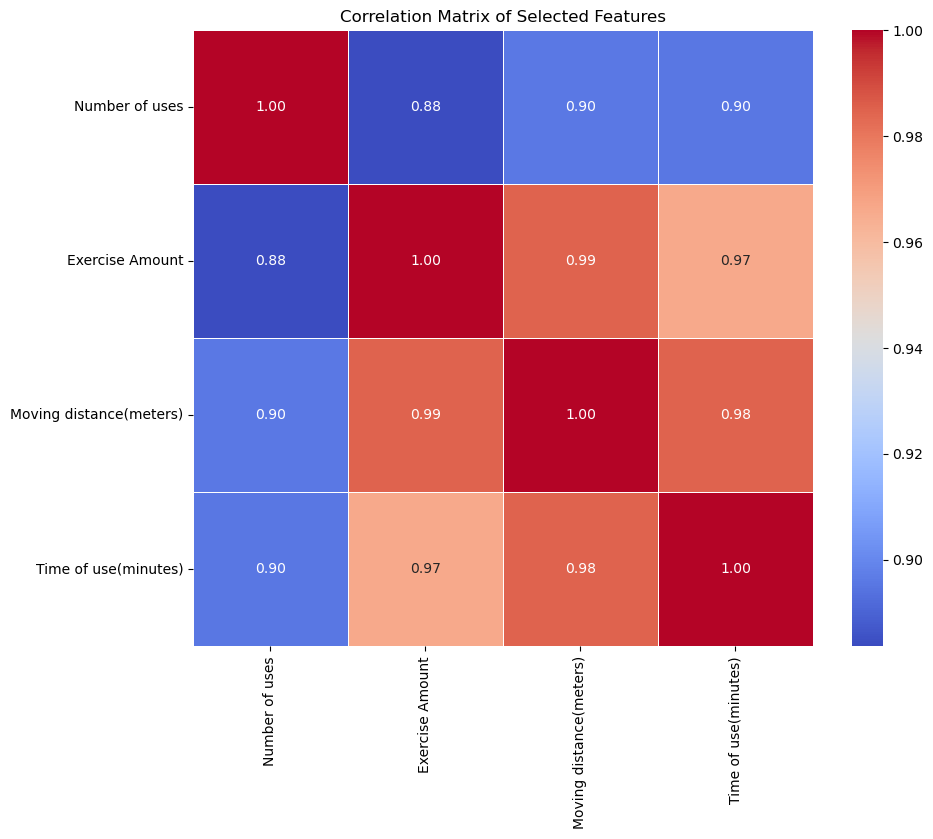

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = sum_by_docking_station.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()


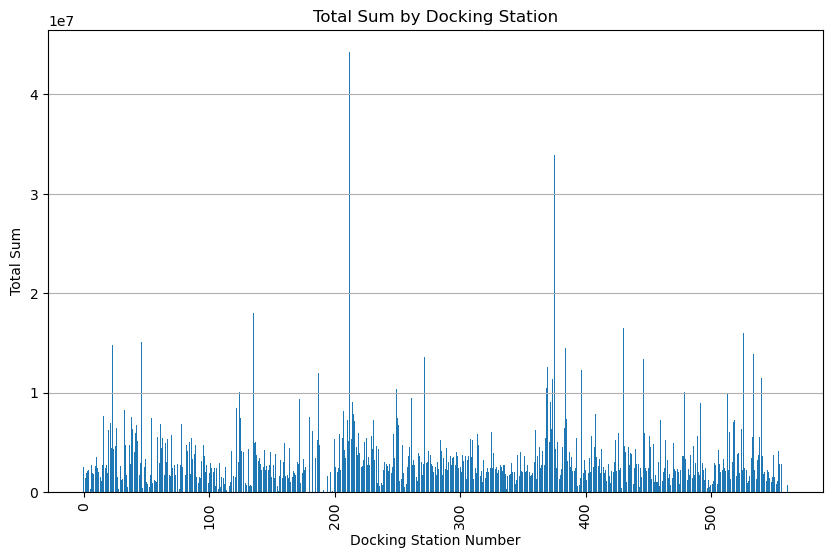

In [88]:
import matplotlib.pyplot as plt

# Assuming you've stored the sums in the DataFrame sum_by_docking_station

# Get the docking station numbers
docking_station_numbers = sum_by_docking_station.index

# Calculate the total sum for each feature
total_sums = sum_by_docking_station.sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(docking_station_numbers, total_sums)
plt.xlabel('Docking Station Number')
plt.ylabel('Total Sum')
plt.title('Total Sum by Docking Station')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [89]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'sum_by_docking_station' is a DataFrame containing the data

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize the data using Z-score normalization
normalized_data = scaler.fit_transform(sum_by_docking_station)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=sum_by_docking_station.columns, index=sum_by_docking_station.index)

# Display the normalized DataFrame
normalized_df


,Number of uses,Exercise Amount,Moving distance(meters),Time of use(minutes)
Docking Station Number,,,,
0,-0.497241,-0.253345,-0.249126,-0.183427
1,-0.883610,-0.577587,-0.569676,-0.517963
2,-0.669130,-0.427134,-0.415834,-0.340582
3,-0.596115,-0.372089,-0.351726,-0.274815
4,-0.635665,-0.354963,-0.341301,-0.213990
...,...,...,...,...
557,-1.204570,-0.985697,-0.979604,-0.913399
558,-1.082879,-0.986310,-0.980331,-0.857253
559,-1.178711,-0.986873,-0.980834,-0.909928


In [90]:
from sklearn.decomposition import PCA

# Assuming 'normalized_df' contains the normalized data

# Initialize PCA with the desired number of components
pca = PCA(n_components=2)  # You can choose the number of components you want to visualize

# Fit PCA to the normalized data
pca.fit(normalized_df)

# Transform the data into principal components
principal_components = pca.transform(normalized_df)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=normalized_df.index)

# Display the DataFrame with the principal components
print(principal_df)


                             PC1       PC2
Docking Station Number                    
0                      -0.586659 -0.241226
1                      -1.268276 -0.307476
2                      -0.921240 -0.252559
3                      -0.792487 -0.239613
4                      -0.766877 -0.296848
...                          ...       ...
557                    -2.036828 -0.250487
558                    -1.950468 -0.156828
559                    -2.023826 -0.227968
560                    -2.016312 -0.243790
561                    -1.657472 -0.259137

[562 rows x 2 columns]


In [91]:
from sklearn.cluster import KMeans

# Assuming 'principal_components' contains the transformed principal components
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=5)  # You can choose the number of clusters based on your data

# Fit KMeans to the principal components
kmeans.fit(principal_components)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the principal DataFrame
principal_df['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(principal_df)



                             PC1       PC2  Cluster
Docking Station Number                             
0                      -0.586659 -0.241226        1
1                      -1.268276 -0.307476        4
2                      -0.921240 -0.252559        4
3                      -0.792487 -0.239613        4
4                      -0.766877 -0.296848        4
...                          ...       ...      ...
557                    -2.036828 -0.250487        4
558                    -1.950468 -0.156828        4
559                    -2.023826 -0.227968        4
560                    -2.016312 -0.243790        4
561                    -1.657472 -0.259137        4

[562 rows x 3 columns]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


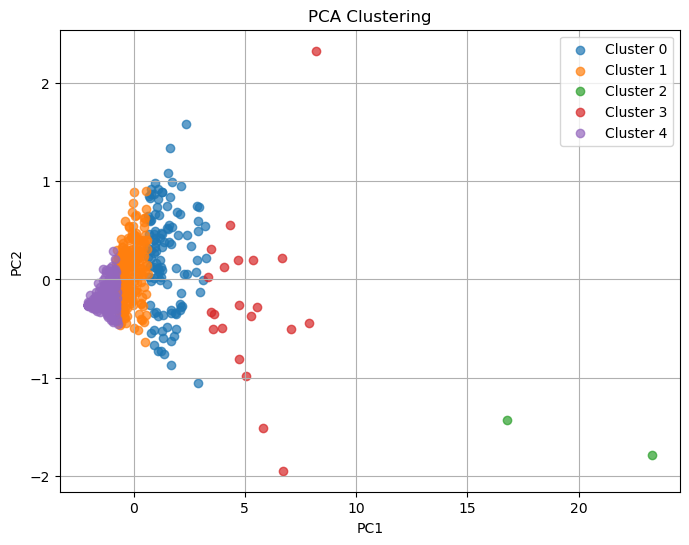

In [92]:
import matplotlib.pyplot as plt

# Scatter plot of PCA-transformed data with cluster coloring
plt.figure(figsize=(8, 6))
for cluster in set(cluster_labels):
    plt.scatter(principal_df.loc[principal_df['Cluster'] == cluster, 'PC1'],
                principal_df.loc[principal_df['Cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Clustering')
plt.legend()
plt.grid(True)
plt.show()


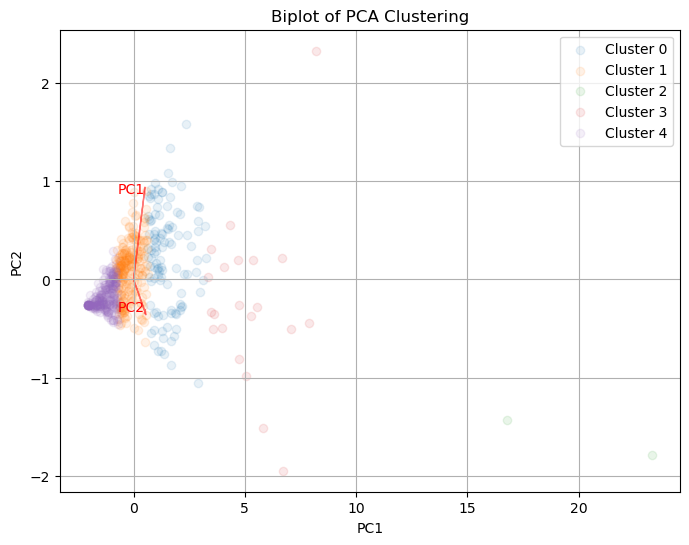

In [93]:
import numpy as np

# Scatter plot of PCA-transformed data with cluster coloring
plt.figure(figsize=(8, 6))
for cluster in set(cluster_labels):
    plt.scatter(principal_df.loc[principal_df['Cluster'] == cluster, 'PC1'],
                principal_df.loc[principal_df['Cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}',
                alpha=0.1)

# Add arrows representing the original features (loadings)
feature_vectors = pca.components_.T  # Transpose to align with columns of the original data
for i, feature in enumerate(principal_df.columns[:-1]):  # Exclude the last column which is 'Cluster'
    plt.arrow(0, 0, feature_vectors[i, 0], feature_vectors[i, 1], color='r',
              alpha=0.5, width=0.005, head_width=0.05)
    plt.text(feature_vectors[i, 0], feature_vectors[i, 1], feature, color='r', fontsize=10, ha='right')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of PCA Clustering')
plt.legend()
plt.grid(True)
plt.show()


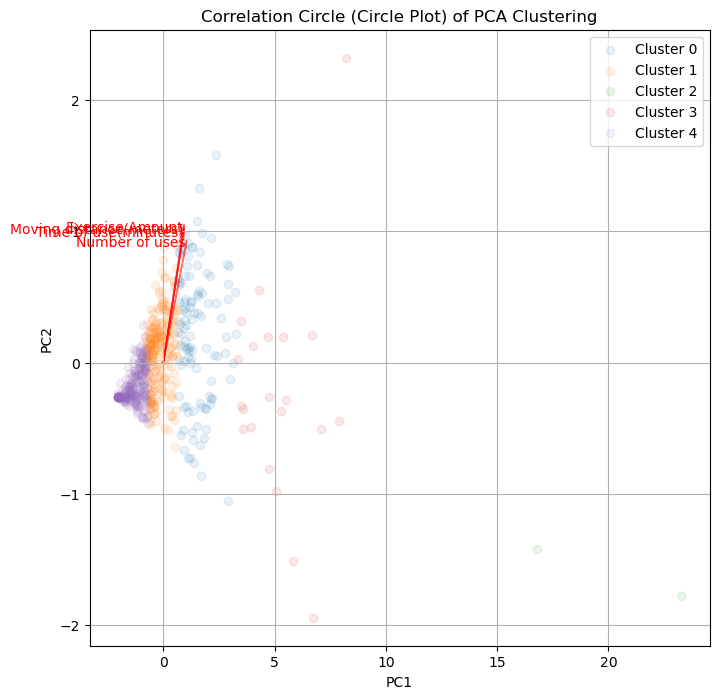

In [94]:
# Scatter plot of PCA-transformed data with cluster coloring
plt.figure(figsize=(8, 8))
for cluster in set(cluster_labels):
    plt.scatter(principal_df.loc[principal_df['Cluster'] == cluster, 'PC1'],
                principal_df.loc[principal_df['Cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}',
                alpha=0.1)  # Decrease alpha to make scatter points less prominent

# Plot correlation circle
for i, feature in enumerate(normalized_df.columns):
    plt.arrow(0, 0, feature_pca_corr[i, 0], feature_pca_corr[i, 1], color='r',
              alpha=0.5, width=0.005, head_width=0.05)
    plt.text(feature_pca_corr[i, 0], feature_pca_corr[i, 1], feature, color='r', fontsize=10, ha='right')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Correlation Circle (Circle Plot) of PCA Clustering')
plt.legend()
plt.grid(True)
plt.show()
